In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class DifusaoSal:
    """
    Classe para simular e visualizar a difusão de sal em um tubo.
    """
    def __init__(self, M, R2, D, x0):
        """
        Parâmetros:
        M (float): Massa total de sal (kg).
        R2 (float): Raio do tubo (m).
        D (float): Coeficiente de difusão do sal em água (m^2/s).
        x0 (float): Posição inicial do centro da massa de sal (m).
        """
        self.M = M
        self.R2 = R2
        self.D = D
        self.x0 = x0
        self.pi_3_2 = np.pi**1.5 

    def calcular_concentracao(self, x_array, t_segundos):
        """
        Calcula a concentração C(x,t) para um array de posições x e um tempo t.
        """
        if t_segundos <= 0:
            # A fórmula diverge em t=0 (singularidade da fonte pontual)
            return np.full_like(x_array, np.nan)

        termo_temporal_den = 4 * self.D * t_segundos

        if termo_temporal_den <= 1e-18: # Evita divisão por zero ou problemas com t muito pequeno
             return np.full_like(x_array, np.nan)

        denominador_constante = self.pi_3_2 * self.R2**2
        denominador_raiz_tempo = np.sqrt(termo_temporal_den)
        denominador_total = denominador_constante * denominador_raiz_tempo

        if denominador_total < 1e-18: # Underflow ou D=0
            return np.full_like(x_array, np.nan)

        exponente = -((x_array - self.x0)**2) / termo_temporal_den
        C_xt = (self.M / denominador_total) * np.exp(exponente)
        return C_xt

    def plotar_evolucao_temporal(self, x_dominio_m, tempos_para_plot_s):
        """
        Gera e exibe um gráfico da concentração C(x,t) em função de x
        para diferentes instantes de tempo t.
        """
        fig, ax = plt.subplots(figsize=(12, 7))

        for t_s in tempos_para_plot_s:
            C_xt_valores = self.calcular_concentracao(x_dominio_m, t_s)
            
            # Formata a legenda do tempo para melhor leitura
            if t_s < 3600: # Menos de 1 hora
                label_tempo_str = f'{t_s/60:.0f} min'
            elif t_s % 3600 == 0 : # Horas exatas
                label_tempo_str = f'{t_s/3600:.0f} h'
            else: # Horas com parte decimal
                label_tempo_str = f'{t_s/3600:.1f} h'
            
            # Converte x para cm para o plot
            ax.plot(x_dominio_m * 100, C_xt_valores, label=f't = {label_tempo_str}')

        ax.set_xlabel('Posição $x$ (cm)')
        ax.set_ylabel('Concentração $C(x,t)$ (kg/m³)')
        ax.set_title(
            f'Evolução da Concentração de Sal no Tubo\n'
            f'(M={self.M} kg, $R_2$={self.R2*100:.0f} cm, D={self.D:.1e} m²/s)'
        )
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # # Adiciona uma linha horizontal para a solubilidade do NaCl
        # solubilidade_nacl_kg_m3 = 359 
        # ax.axhline(y=solubilidade_nacl_kg_m3, color='dimgray', linestyle=':', linewidth=2, 
        #             label=f'Solubilidade NaCl ({solubilidade_nacl_kg_m3} kg/m³)')
        
        ax.legend(fontsize='small')
        plt.tight_layout() # Ajusta o layout para evitar sobreposições
        plt.show()

In [14]:
massa_sal = 0.1  # Kg
raio_tubo = 0.05  # m
D_nacl = 1.5e-9 # m^2/s
posicao_inicial = 0.0  # m

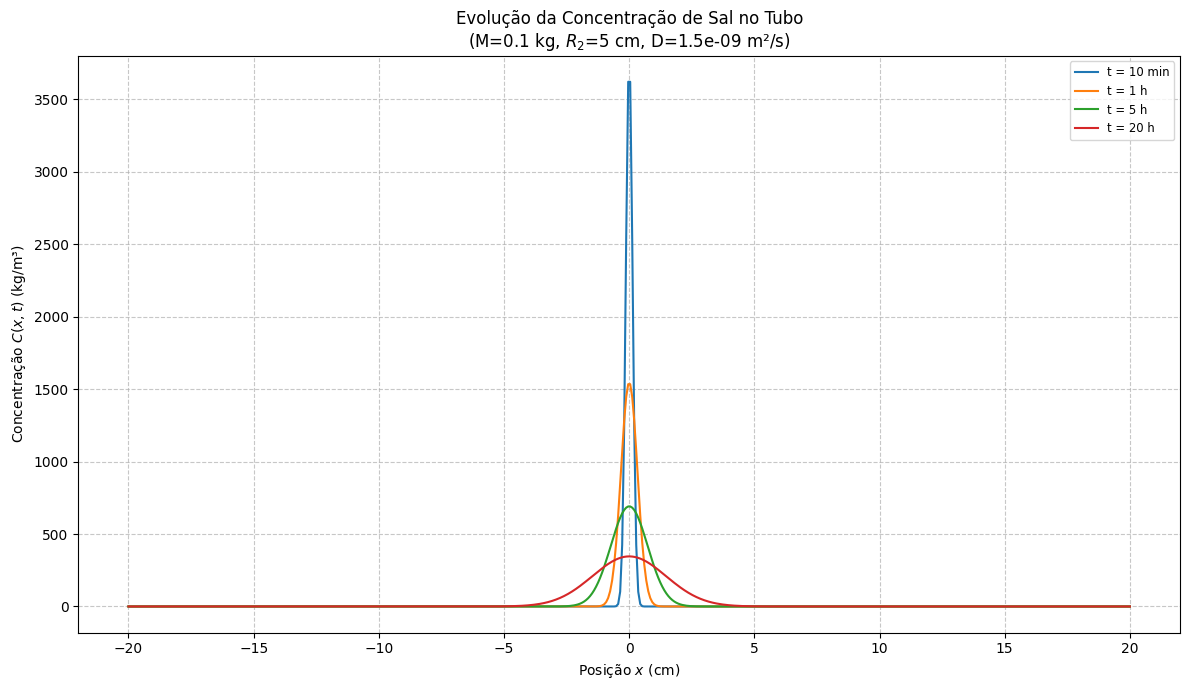

In [15]:
# Criar instância do simulador
simulador = DifusaoSal(M=massa_sal, R2=raio_tubo, D=D_nacl, x0=posicao_inicial)

x_plot_m = np.linspace(-0.2, 0.2, 500)  

# Tempos para os quais queremos ver a curva de concentração (em segundos)
tempos_plot_s = np.array([
    10 * 60,        # 10 minutos
    1 * 60 * 60,    # 1 hora
    5 * 60 * 60,    # 5 horas
    20 * 60 * 60    # 20 horas
])

# Gerar e mostrar o gráfico
simulador.plotar_evolucao_temporal(x_plot_m, tempos_plot_s)